In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Load Dataset
df = pd.read_csv('Dataset_Corrosion.csv', delimiter=',')

# Convert all numeric-looking columns from comma decimal to float
def convert_comma_decimal(df):
    for col in df.columns:
        try:
            # Replace commas with dots and attempt conversion
            df[col] = df[col].str.replace(',', '.').astype(float)
        except:
            # If conversion fails, keep as is (likely categorical)
            pass
    return df

df = convert_comma_decimal(df)

# 1. Basic Data Overview
def basic_info(df):
    print("Shape of dataset:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nFirst 5 rows:\n", df.head())
    print("\nLast 5 rows:\n", df.tail())

# 2. Missing Values
def missing_values(df):
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
    print("\nMissing Values:\n", missing_df[missing_df['Missing Values'] > 0])

# 3. Statistical Summary
def statistical_summary(df):
    print("\nStatistical Summary:\n", df.describe(include='all'))

# 4. Categorical vs Numerical
def feature_types(df):
    categorical = df.select_dtypes(include=['object']).columns.tolist()
    numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("\nCategorical Features:", categorical)
    print("Numerical Features:", numerical)
    return categorical, numerical

# 5. Univariate Analysis
def univariate_analysis(df, categorical, numerical):
    for col in numerical:
        plt.figure()
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
        
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

    for col in categorical:
        plt.figure()
        sns.countplot(x=df[col])
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.show()

# 6. Correlation Matrix for Numerical
def correlation_matrix(df, numerical):
    plt.figure(figsize=(12, 8))
    corr = df[numerical].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

# 7. Outlier Detection
def outlier_detection(df, numerical):
    for col in numerical:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Outlier Detection for {col}')
        plt.show()

# 8. Bivariate Analysis
def bivariate_analysis(df, numerical, categorical):
    for cat in categorical:
        for num in numerical:
            plt.figure()
            sns.boxplot(x=df[cat], y=df[num])
            plt.title(f'{num} by {cat}')
            plt.xticks(rotation=45)
            plt.show()

# Corrosion as target variable
TARGET = 'Corrosion'

# 9. Target Variable Analysis
def target_analysis(df, target):
    plt.figure()
    if df[target].dtype == 'object':
        sns.countplot(x=df[target])
    else:
        sns.histplot(df[target], kde=True)
    plt.title(f'Distribution of Target: {target}')
    plt.show()
    print(f"\nTarget Variable ({target}) Summary:\n", df[target].describe())

# 10. Correlation with Target
def correlation_with_target(df, numerical, target):
    corr_target = df[numerical].corr()[target].sort_values(ascending=False)
    print(f"\nCorrelation of Numerical Features with Target ({target}):\n", corr_target)

# 11. Feature-Target Bivariate Plots
def feature_target_relationship(df, numerical, categorical, target):
    for num in numerical:
        if num != target:
            plt.figure()
            sns.scatterplot(x=df[num], y=df[target])
            plt.title(f'{num} vs {target}')
            plt.show()
    
    for cat in categorical:
        plt.figure()
        sns.boxplot(x=df[cat], y=df[target])
        plt.title(f'{target} by {cat}')
        plt.xticks(rotation=45)
        plt.show()




In [8]:
# Run Updated EDA Pipeline
basic_info(df)


Shape of dataset: (1100, 4)

Data Types:
 Temperature    float64
Salinity       float64
Pressure       float64
Corrosion      float64
dtype: object

First 5 rows:
    Temperature   Salinity    Pressure  Corrosion
0    14.363503  30.578427  488.423364   1.204364
1    28.767858  39.691026   56.249576   3.633222
2    23.299849  38.837859  211.851666   2.745042
3    19.966462  39.277523   21.970313   2.172454
4     8.900466  39.949078  370.212156   1.443150

Last 5 rows:
       Temperature   Salinity    Pressure  Corrosion
1095     9.413201  34.470555   34.215799   1.145277
1096    10.512155  34.603583  324.510686   1.329973
1097     9.660957  38.645636   37.978606   1.574996
1098    24.489612  35.466482  188.358995   3.154250
1099    13.753131  33.804005  402.103458   1.757596


In [9]:
missing_values(df)



Missing Values:
 Empty DataFrame
Columns: [Missing Values, Percent]
Index: []


In [10]:
statistical_summary(df)



Statistical Summary:
        Temperature     Salinity     Pressure    Corrosion
count  1100.000000  1100.000000  1100.000000  1100.000000
mean     17.354307    35.057673   247.648882     2.174481
std       7.343450     2.893605   144.439286     0.805827
min       5.115801    30.032183     1.005806     0.100000
25%      10.908051    32.470721   127.801779     1.551107
50%      17.499481    35.182434   247.109586     2.164245
75%      23.753101    37.563104   370.283515     2.801745
max      29.992942    39.994137   498.912607     4.177379



Categorical Features: []
Numerical Features: ['Temperature', 'Salinity', 'Pressure', 'Corrosion']


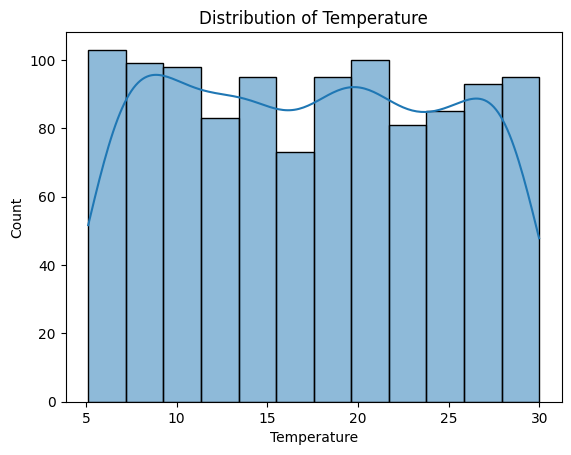

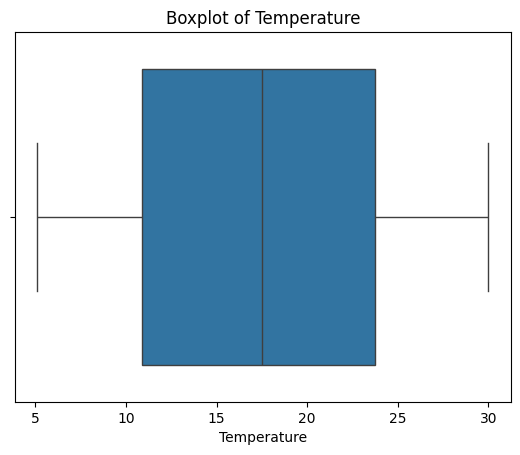

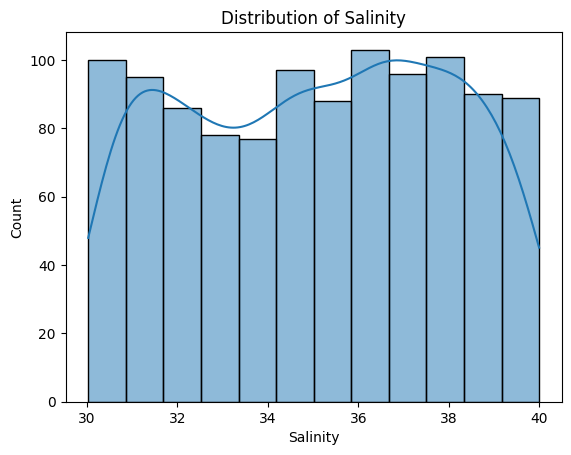

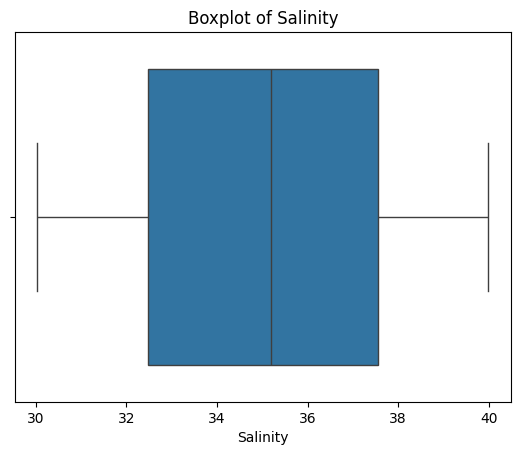

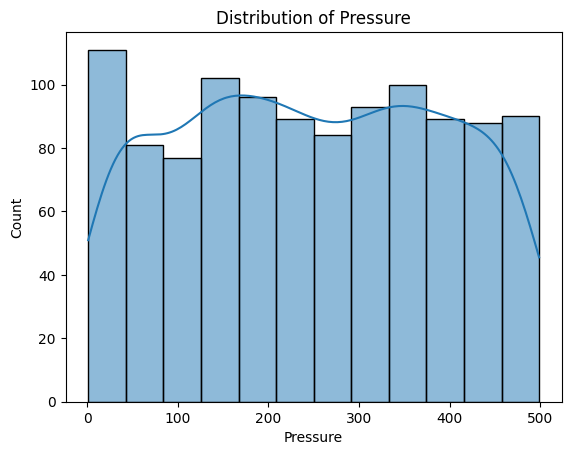

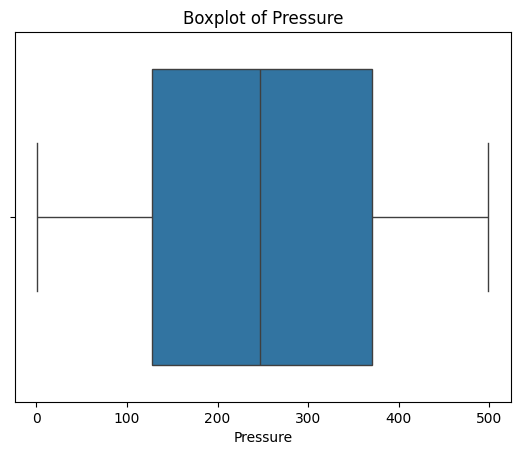

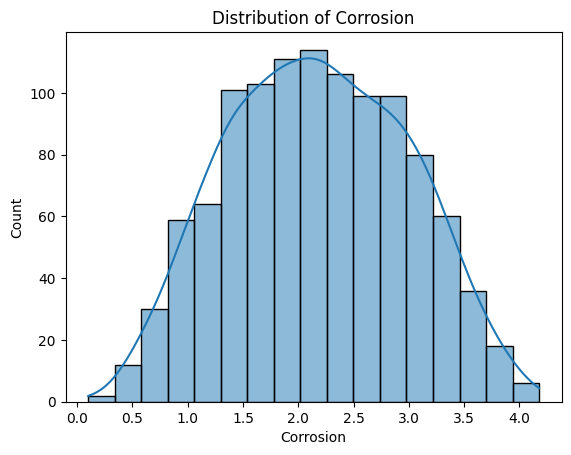

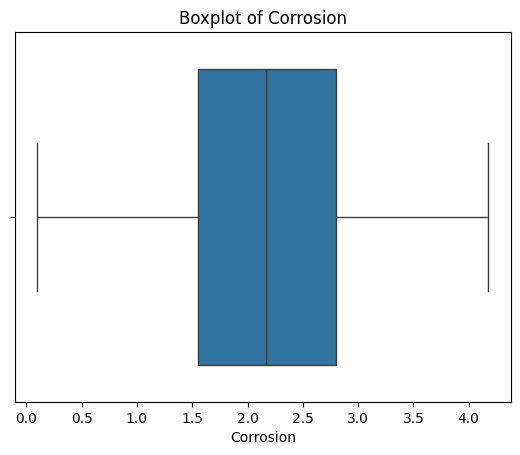

In [11]:
categorical, numerical = feature_types(df)
univariate_analysis(df, categorical, numerical)


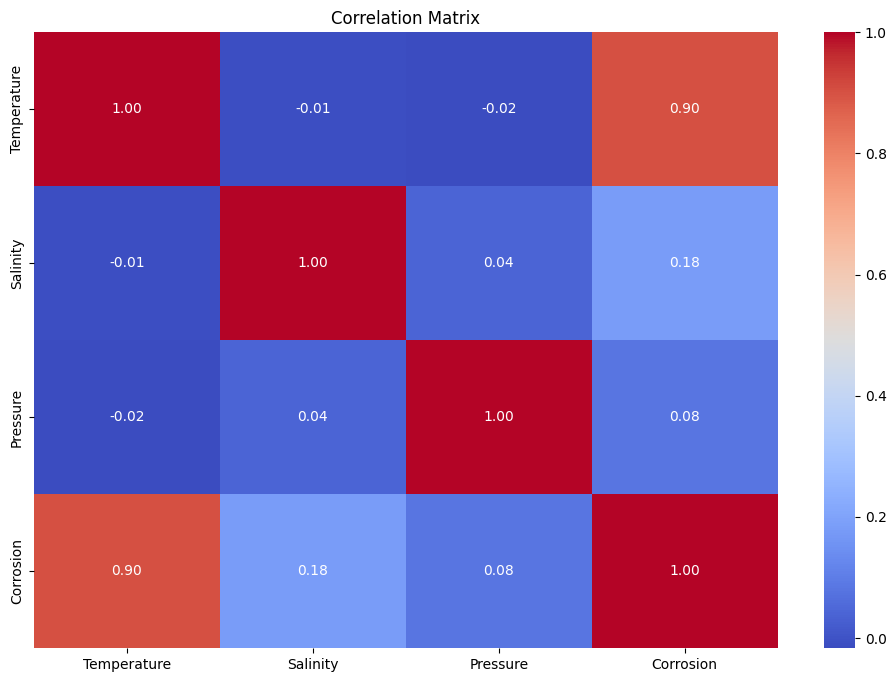

In [12]:
correlation_matrix(df, numerical)


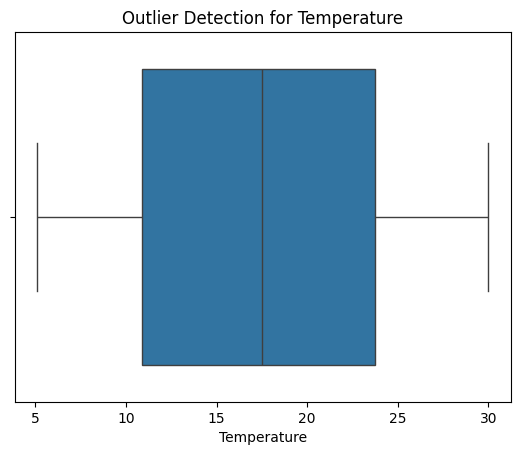

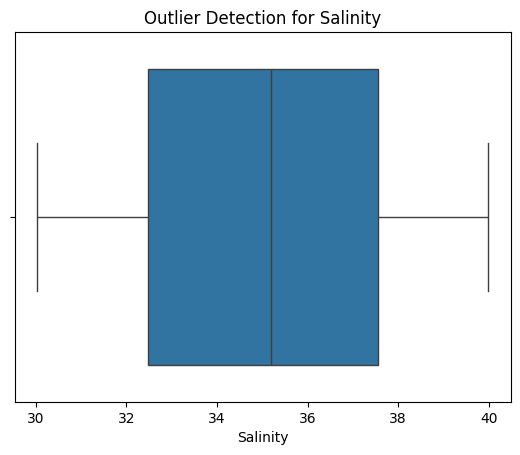

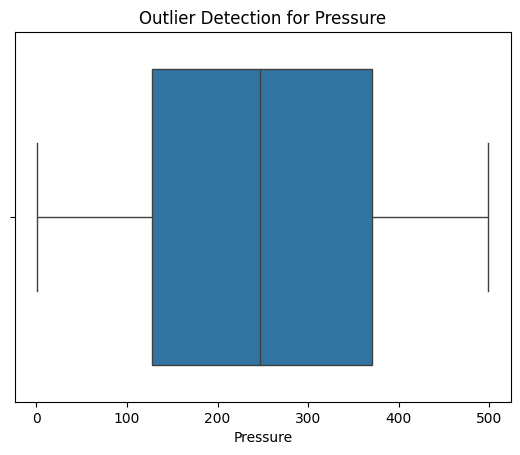

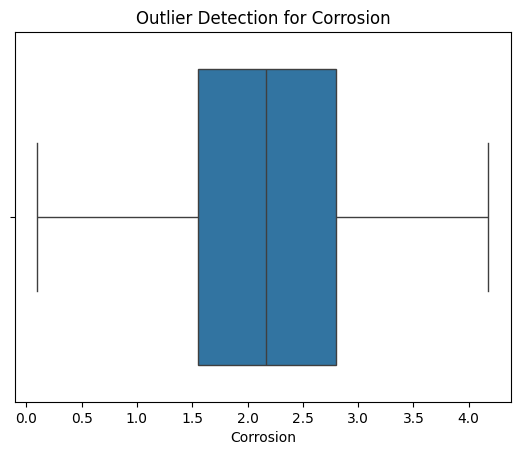

In [13]:
outlier_detection(df, numerical)


In [14]:
bivariate_analysis(df, numerical, categorical)


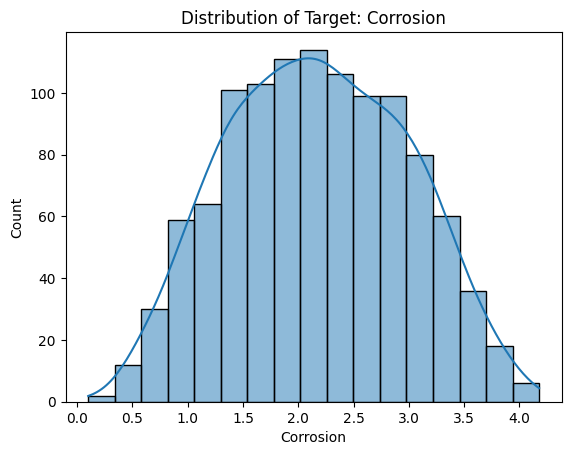


Target Variable (Corrosion) Summary:
 count    1100.000000
mean        2.174481
std         0.805827
min         0.100000
25%         1.551107
50%         2.164245
75%         2.801745
max         4.177379
Name: Corrosion, dtype: float64


In [15]:
target_analysis(df, TARGET)


In [16]:
correlation_with_target(df, numerical, TARGET)



Correlation of Numerical Features with Target (Corrosion):
 Corrosion      1.000000
Temperature    0.902196
Salinity       0.180600
Pressure       0.081863
Name: Corrosion, dtype: float64


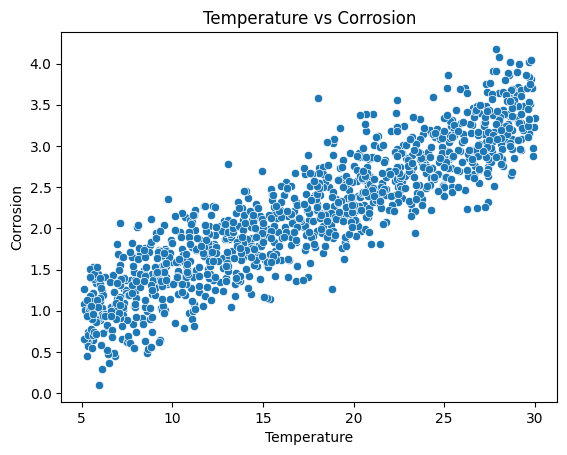

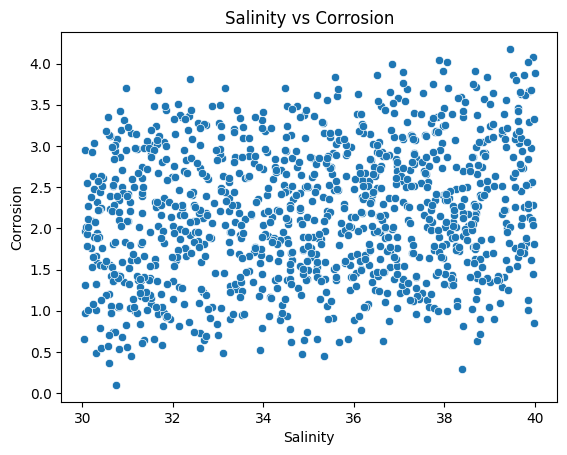

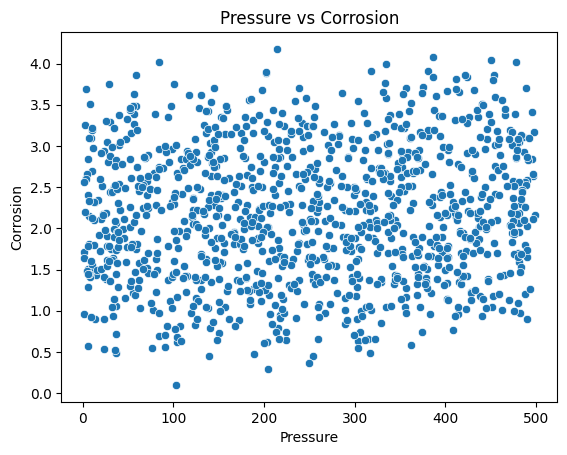

In [29]:
feature_target_relationship(df, numerical, categorical, TARGET)